In [1]:
import pandas as pd

In [18]:
trainFile='train_sequences.txt'

df=pd.read_csv(trainFile,delimiter='\t',header=None)

Appears that the head and tail sequences are mostly same for this dataset, we can remove these sequences that are uninformative,

In [19]:
df.columns=['Sequence','Exp']

In [4]:
sequenceList=list(df['Sequence'])

5
7.419215501055977e-07


In [7]:
print(len(tailSet))
print(len(tailSet)/(len(df)))

25
3.7096077505279886e-06


In [5]:
df.head()

,Sequence,Exp
0,TGCATTTTTTTCACATCTATGTTGCGTTAGAACGATATTGGAACAC...,6.0
1,TGCATTTTTTTCACATCTGTGAAGAATATCAGCTTTCAATCGTATT...,8.0
2,TGCATTTTTTTCACATCAATCCGAGATATCTGTTGATAAACTTACC...,9.0
3,TGCATTTTTTTCACATCAAGTTATCTGGTGTACGTTTTCTCGTATA...,12.0
4,TGCATTTTTTTCACATCCGACTACTGCATTTTGATCTTATAGATAA...,11.0


Now we check if there are duplicates of sequences in the training file, it appears there is no duplicate

In [9]:
df_sub=df.sample(n=10000)
df_sub.to_csv("train_10000.csv")

<AxesSubplot:ylabel='Frequency'>

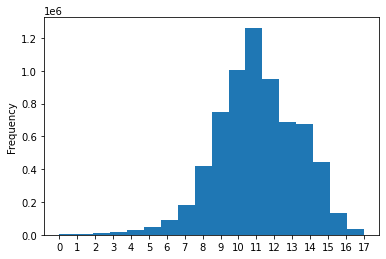

In [21]:

df['Exp'].plot.hist(xticks=range(0,18),bins=18)



In [18]:
df['Exp']

0           6.000000
1           8.000000
2           9.000000
3          12.000000
4          11.000000
             ...    
6739252    11.000000
6739253    14.000000
6739254     5.223988
6739255    12.000000
6739256    10.463105
Name: Exp, Length: 6739257, dtype: float64

In [12]:
print(len(set(df['Exp'])))

1048845


In [6]:
bins_interval=[0,8,11,14,18]#define 4 bins in these intervals
bins=len(bins_interval)-1
df_sampled=pd.DataFrame()


In [7]:
for i in range(bins):
    low=bins_interval[i]
    high=bins_interval[i+1]
    df_filter_low=df[df['Exp'] > low]
    df_filter_low_high=df_filter_low[df_filter_low[,header=None'Exp'] <= high]
    #print(low,high)
    #print(df_filter_low_high.head())
    #print(len(df_filter_low_high))
    df_filter_low_high=df_filter_low_high.sample(6000)
    df_sampled=df_sampled.append(df_filter_low_high)

/tmp/ipykernel_45861/874801196.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sampled=df_sampled.append(df_filter_low_high)
/tmp/ipykernel_45861/874801196.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sampled=df_sampled.append(df_filter_low_high)
/tmp/ipykernel_45861/874801196.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sampled=df_sampled.append(df_filter_low_high)
/tmp/ipykernel_45861/874801196.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sampled=df_sampled.append(df_filter_low_high)


In [8]:
from sklearn.utils import shuffle

df_sampled = shuffle(df_sampled)

In [22]:
df.head()

,Sequence,Exp
0,TGCATTTTTTTCACATCTCTTTGCCACGGGGTGAAGGATAGGATGG...,11.0
1,TGCATTTTTTTCACATCTATGTTGCGTTAGAACGATATTGGAACAC...,6.0
2,TGCATTTTTTTCACATCTGTGAAGAATATCAGCTTTCAATCGTATT...,8.0
3,TGCATTTTTTTCACATCAATCCGAGATATCTGTTGATAAACTTACC...,9.0
4,TGCATTTTTTTCACATCAAGTTATCTGGTGTACGTTTTCTCGTATA...,12.0


In [21]:

df.to_csv("train_all_untailored_seq.csv",index=False)

In [10]:
testFile='test_sequences.txt'
df=pd.read_csv(testFile,delimiter='\t',header=None)
df.columns=['Sequence','Exp']
df=df.fillna(0)
df.to_csv('test.csv',index=False)

In [89]:
len(df)

71103